In [193]:
#Importing packages
import fastf1 as ff1
import pandas as pd
import numpy as np
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [194]:
#Set up plotting
plotting.setup_mpl()


#Enabling Caching
ff1.Cache.enable_cache('cache')

pd.options.mode.chained_assignment = None 

In [205]:
#Loading Session Data
race = ff1.get_session(2021, 'Abu_Dhabi', 'R')

#Getting Laps
laps = race.load_laps(with_telemetry=True)

core           INFO 	Loading laps for Abu Dhabi Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 19 drivers: ['3', '11', '31', '18', '7', '47', '33', '63', '14', '5', '4', '6', '55', '16', '77', '99', '10', '44', '22']


In [196]:
#Selecting the drivers needed
laps_ham = laps.pick_driver('HAM')
laps_ver = laps.pick_driver('VER')

In [197]:
#Removing one lap since the first lap is the formation lap
laps_ham['RaceLapNumber'] = laps_ham['LapNumber'] -1
laps_ver['RaceLapNumber'] = laps_ver['LapNumber'] -1

In [198]:
full_distance_ver_ham = pd.DataFrame()
summarized_ver_ham = pd.DataFrame()

In [199]:
for lap in laps_ver.iterlaps():
    telemetry = lap[1].get_car_data().add_distance().add_driver_ahead()
    
    telemetry = telemetry.loc[telemetry["DriverAhead"] == '44']
    
    if len(telemetry) != 0:
        #Full Distance
        lap_telemetry = telemetry[['Distance', 'DistanceToDriverAhead']]
        lap_telemetry.loc[:, 'Lap'] = lap[0] + 1
    
    full_distance_ver_ham = full_distance_ver_ham.append(lap_telemetry)
    
    #Average/median distance
    distance_mean = np.nanmean(telemetry['DistanceToDriverAhead'])
    distance_median = np.nanmedian(telemetry['DistanceToDriverAhead'])
    
    summarized_ver_ham = summarized_ver_ham.append({
        'Lap' : lap[0]+1,
        'Mean': distance_mean,
        'Median': distance_median
    }, ignore_index = True)

<ipython-input-199-115fa65d0772>:14: RuntimeWarning: Mean of empty slice
  distance_mean = np.nanmean(telemetry['DistanceToDriverAhead'])
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
<ipython-input-199-115fa65d0772>:14: RuntimeWarning: Mean of empty slice
  distance_mean = np.nanmean(telemetry['DistanceToDriverAhead'])
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
<ipython-input-199-115fa65d0772>:14: RuntimeWarning: Mean of empty slice
  distance_mean = np.nanmean(telemetry['DistanceToDriverAhead'])
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


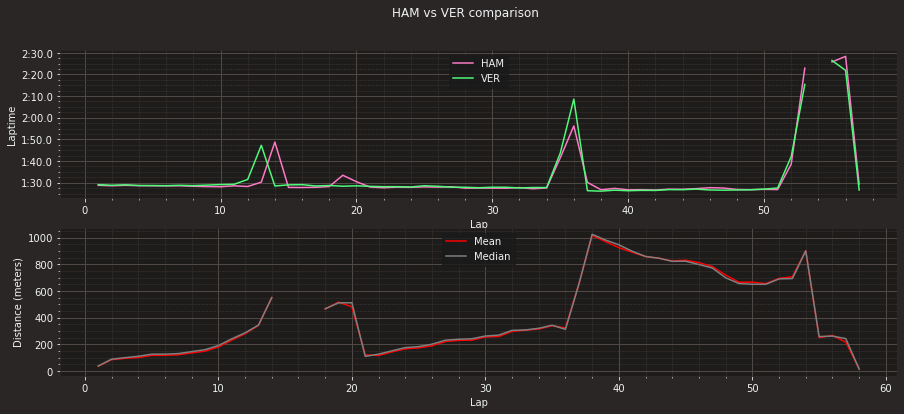

In [200]:
#Plotting the data
plt.rcParams['figure.figsize'] = [15,6]

fig, ax = plt.subplots(2)
fig.suptitle('HAM vs VER comparison')

ax[0].plot(laps_ham['RaceLapNumber'], laps_ham['LapTime'], label = 'HAM')
ax[0].plot(laps_ver['RaceLapNumber'], laps_ver['LapTime'], label = 'VER')
ax[0].set(ylabel = 'Laptime', xlabel = 'Lap')
ax[0].legend(loc = "upper center")

ax[1].plot(summarized_ver_ham['Lap'], summarized_ver_ham['Mean'], label = 'Mean', color = 'red' )
ax[1].plot(summarized_ver_ham['Lap'], summarized_ver_ham['Median'], label = "Median", color = 'grey')
ax[1].set(ylabel = 'Distance (meters)', xlabel ='Lap')
ax[1].legend(loc = 'upper center')

    
plt.show()

In [201]:
# Get lap data
lap_telemetry_ham = laps_ham.loc[laps_ham['RaceLapNumber']==21].get_car_data().add_distance()
lap_telemetry_ver = laps_ver.loc[laps_ver['RaceLapNumber']==21].get_car_data().add_distance()

distance_lap3 = full_distance_ver_ham.loc[full_distance_ver_ham['Lap']==20]
distance_lap4 = full_distance_ver_ham.loc[full_distance_ver_ham['Lap']==21]
distance_lap5 = full_distance_ver_ham.loc[full_distance_ver_ham['Lap']==22]
distance_lap6 = full_distance_ver_ham.loc[full_distance_ver_ham['Lap']==23]


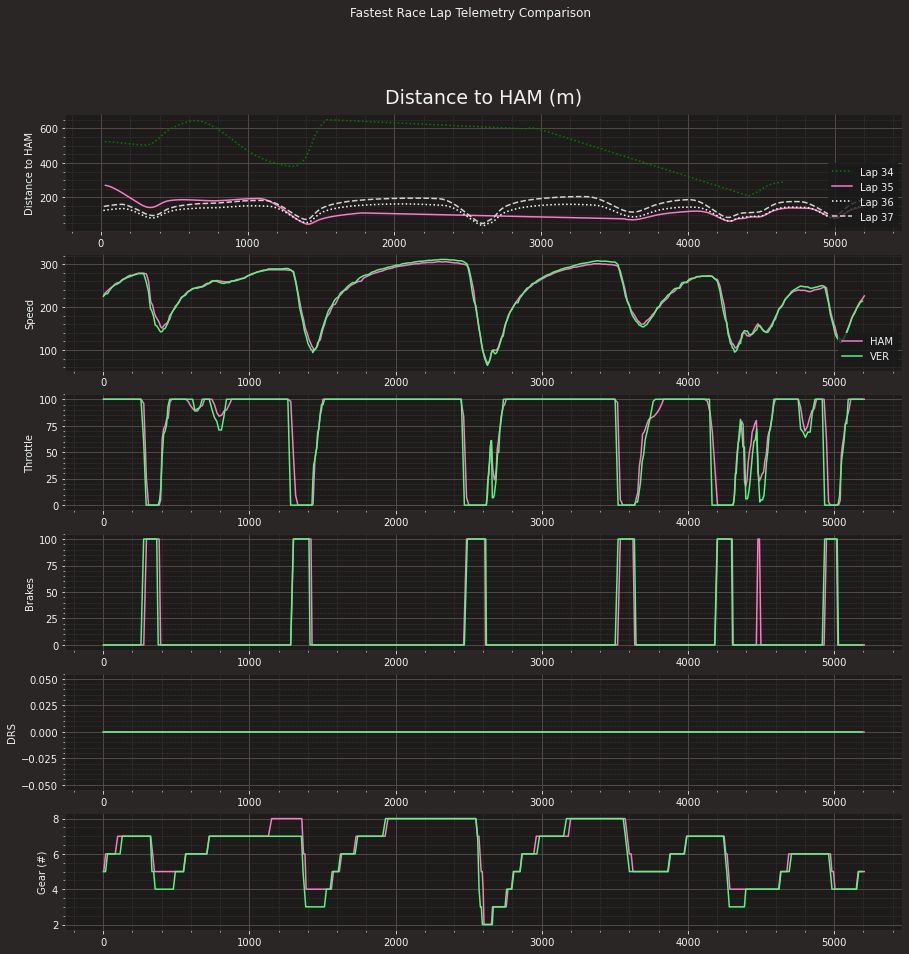

In [206]:
# Make plot a bit bigger
plt.rcParams['figure.figsize'] = [15, 15]

fig, ax = plt.subplots(6)
fig.suptitle("Fastest Race Lap Telemetry Comparison")

ax[0].title.set_text("Distance to HAM (m)")
ax[0].plot(distance_lap3['Distance'], distance_lap3['DistanceToDriverAhead'], label='Lap 34', linestyle='dotted', color='green')
ax[0].plot(distance_lap4['Distance'], distance_lap4['DistanceToDriverAhead'], label='Lap 35')
ax[0].plot(distance_lap5['Distance'], distance_lap5['DistanceToDriverAhead'], label='Lap 36', linestyle='dotted', color='white')
ax[0].plot(distance_lap6['Distance'], distance_lap6['DistanceToDriverAhead'], label='Lap 37', linestyle='dashed', color='lightgrey')
ax[0].legend(loc="lower right")
ax[0].set(ylabel='Distance to HAM')


ax[1].plot(lap_telemetry_ham['Distance'], lap_telemetry_ham['Speed'], label='HAM')
ax[1].plot(lap_telemetry_ver['Distance'], lap_telemetry_ver['Speed'], label='VER')
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")

ax[2].plot(lap_telemetry_ham['Distance'], lap_telemetry_ham['Throttle'], label='HAM')
ax[2].plot(lap_telemetry_ver['Distance'], lap_telemetry_ver['Throttle'], label='VER')
ax[2].set(ylabel='Throttle')

ax[3].plot(lap_telemetry_ham['Distance'], lap_telemetry_ham['Brake'], label='HAM')
ax[3].plot(lap_telemetry_ver['Distance'], lap_telemetry_ver['Brake'], label='VER')
ax[3].set(ylabel='Brakes')

ax[4].plot(lap_telemetry_ham['Distance'], lap_telemetry_ham['DRS'], label='HAM')
ax[4].plot(lap_telemetry_ver['Distance'], lap_telemetry_ver['DRS'], label='VER')
ax[4].set(ylabel='DRS')

ax[5].plot(lap_telemetry_ham['Distance'], lap_telemetry_ham['nGear'], label='HAM')
ax[5].plot(lap_telemetry_ver['Distance'], lap_telemetry_ver['nGear'], label='VER')
ax[5].set(ylabel='Gear (#)')
plt.show()

### Analysing how effect was Sergio Perez's defence during the 20th and 21st lap in the grand finale

In [203]:
# Get lap data
lap_telemetry_ham1 = laps_ham.loc[laps_ham['RaceLapNumber']==20].get_car_data().add_distance()
lap_telemetry_ham = laps_ham.loc[laps_ham['RaceLapNumber']==22].get_car_data().add_distance()

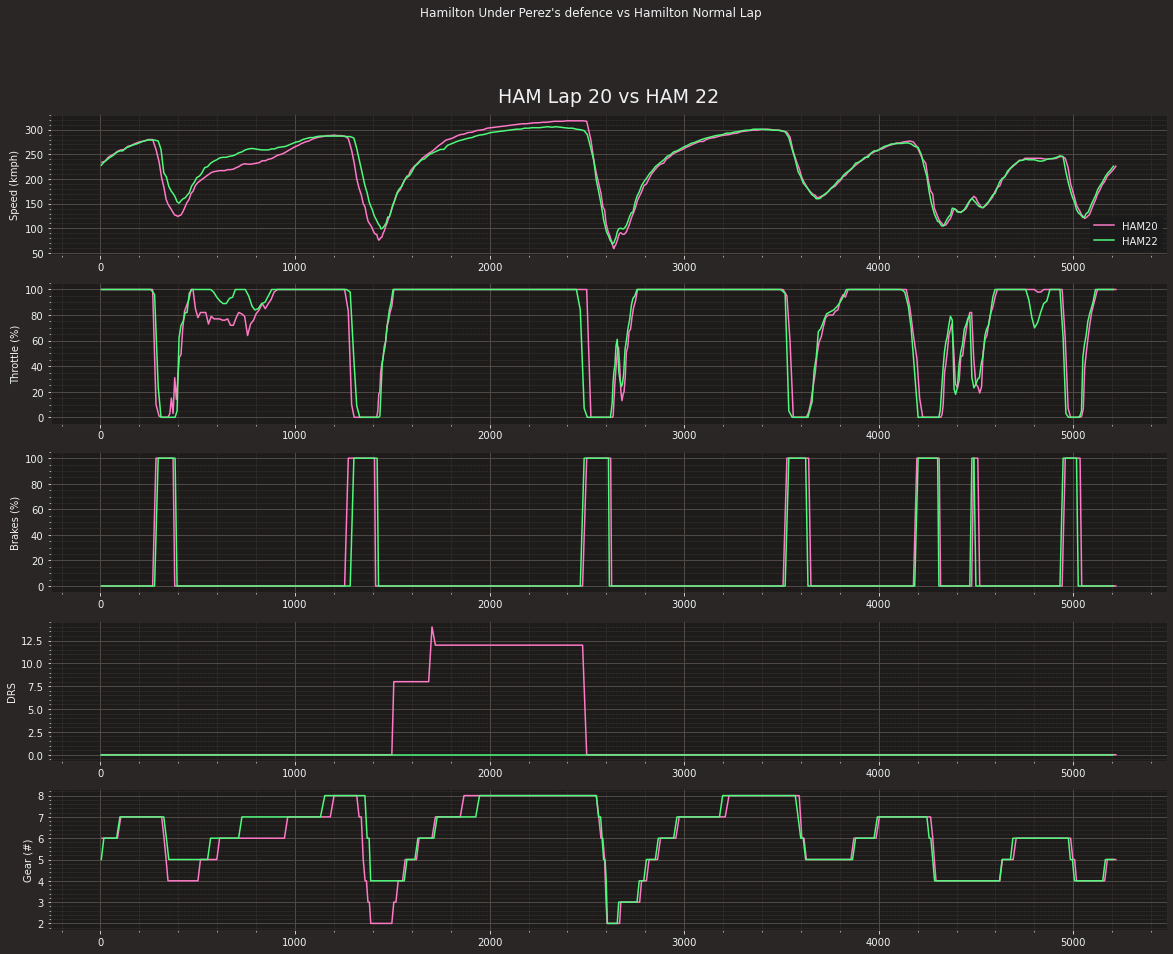

In [204]:
# Make plot a bit bigger
plt.rcParams['figure.figsize'] = [20, 15]

fig, ax = plt.subplots(5)
fig.suptitle("Hamilton Under Perez's defence vs Hamilton Normal Lap")

ax[0].title.set_text("HAM Lap 20 vs HAM 22")
ax[0].plot(lap_telemetry_ham1['Distance'], lap_telemetry_ham1['Speed'], label='HAM20')
ax[0].plot(lap_telemetry_ham['Distance'], lap_telemetry_ham['Speed'], label='HAM22')
ax[0].set(ylabel='Speed (kmph)')
ax[0].legend(loc="lower right")

ax[1].plot(lap_telemetry_ham1['Distance'], lap_telemetry_ham1['Throttle'], label='HAM')
ax[1].plot(lap_telemetry_ham['Distance'], lap_telemetry_ham['Throttle'], label='VER')
ax[1].set(ylabel='Throttle (%)')

ax[2].plot(lap_telemetry_ham1['Distance'], lap_telemetry_ham1['Brake'], label='HAM')
ax[2].plot(lap_telemetry_ham['Distance'], lap_telemetry_ham['Brake'], label='VER')
ax[2].set(ylabel='Brakes (%)')

ax[3].plot(lap_telemetry_ham1['Distance'], lap_telemetry_ham1['DRS'], label='HAM')
ax[3].plot(lap_telemetry_ham['Distance'], lap_telemetry_ham['DRS'], label='VER')
ax[3].set(ylabel='DRS')

ax[4].plot(lap_telemetry_ham1['Distance'], lap_telemetry_ham1['nGear'], label='HAM')
ax[4].plot(lap_telemetry_ham['Distance'], lap_telemetry_ham['nGear'], label='HAM')
ax[4].set(ylabel='Gear (#)')

plt.show()